In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 

In [3]:
data=pd.read_csv('/content/train_bikes.csv')

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print(data.datetime.dt.hour)

In [42]:
data[ data.datetime.dt.year==yea ]

AttributeError: ignored

In [6]:
data_test=pd.read_csv('/content/test_bikes.csv')

[]

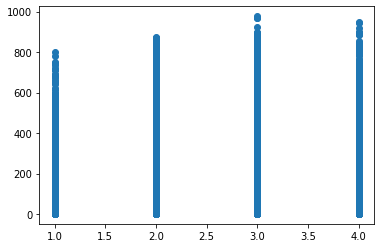

In [14]:
plt.scatter(x=data['season'],y=data['count'])
plt.plot()

[]

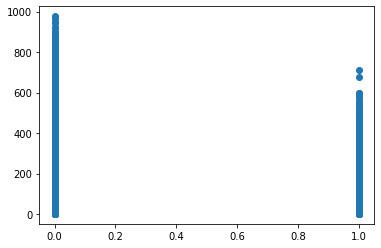

In [16]:
plt.scatter(x=data['holiday'],y=data['count'])
plt.plot()

[]

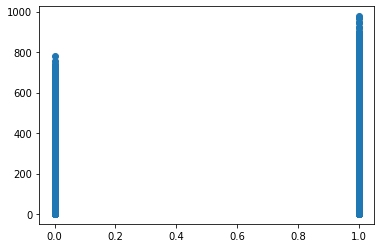

In [18]:
plt.scatter(x=data['workingday'],y=data['count'])
plt.plot()

[]

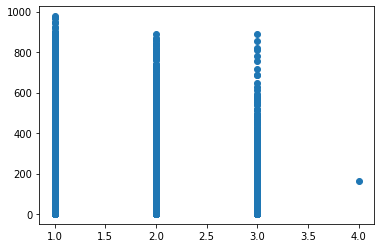

In [19]:
plt.scatter(x=data['weather'],y=data['count'])
plt.plot()

[]

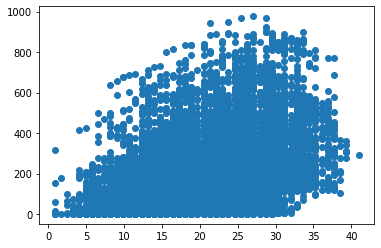

In [20]:
plt.scatter(x=data['temp'],y=data['count'])
plt.plot()

In [21]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [25]:
!pip install pandas-profiling

In [26]:
import pandas_profiling


In [28]:
#shape of train data
print(data.shape)

(10886, 12)


In [33]:
#if any null values
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [105]:
#convert into the date time format
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M')
data_test['datetime'] = pd.to_datetime(data_test['datetime'], format='%Y-%m-%d %H:%M')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


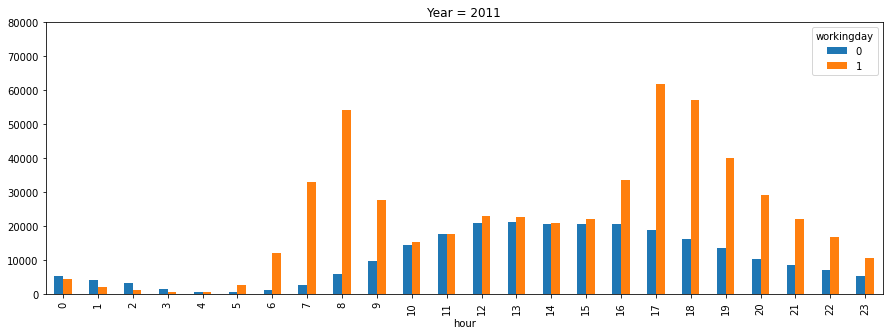

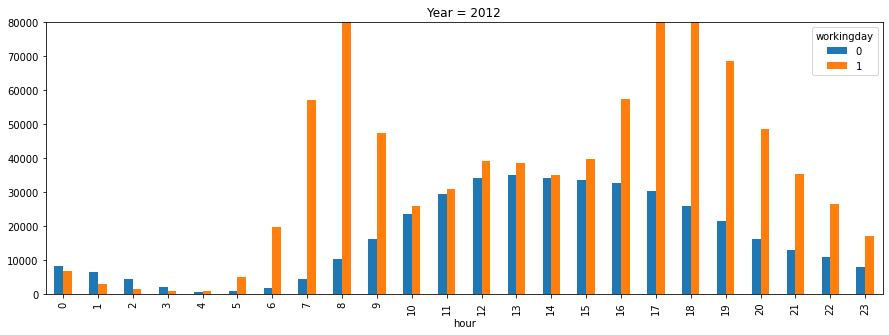

In [95]:
#create count plot based on hour
def plot_by_hour(data,year):
  dd=data
  if year:dd=dd[dd.datetime.dt.year==year]
  dd['hour']=dd.datetime.dt.hour
  hour_db=dd.groupby(['hour','workingday'])['count'].sum().unstack()
  return hour_db.plot(kind='bar',ylim=(0,80000),figsize=(15,5),title="Year = {0}".format(year))

plot_by_hour(data,2011) 
plot_by_hour(data,2012) 


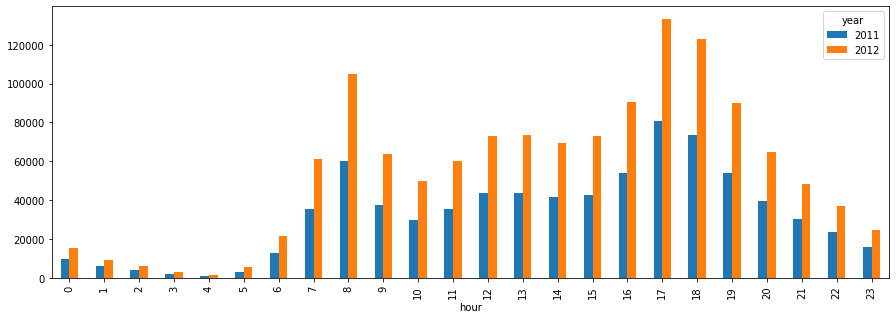

In [101]:
#method to create count plot based on year
def plot_by_year(attrb):
  dd=data.copy()
  dd['hour']=data.datetime.dt.hour
  dd['month']=data.datetime.dt.month
  dd['year']=data.datetime.dt.year
  by_year=dd.groupby([attrb,'year'])['count'].sum().unstack()
  return by_year.plot(kind='bar',figsize=(15,5))

plot_by_year('hour')

In [102]:
data['hour']=data.datetime.dt.hour

In [103]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [106]:
data_test['hour']=data_test.datetime.dt.hour

In [108]:
#method to convert hours to categorical data
def conv_hour(x):
  if 0<=x<6:
    return 0
  elif 6<=x<13:
    return 1
  elif 13<=x<19:
    return 2
  elif 19<=x<24:
    return 3


In [109]:
data['hour']=data['hour'].apply(conv_hour)

In [111]:
data_test['hour']=data_test['hour'].apply(conv_hour)

In [112]:
data=data.drop(['datetime'],axis=1)
data_test=data_test.drop(['datetime'],axis=1)

In [113]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [115]:
print(data['count'].mean())

191.57413191254824


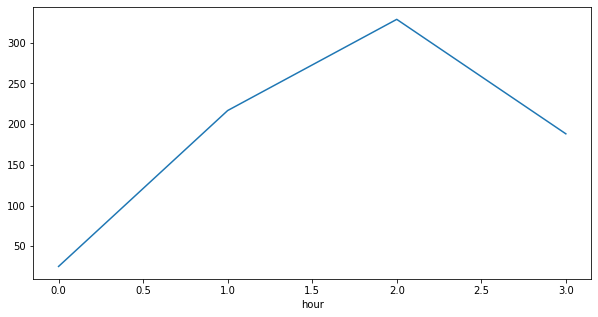

In [119]:
figure,axes=plt.subplots(figsize=(10,5))
hou=data.groupby(['hour']).agg('mean')['count']
hou.plot(kind="line", ax=axes) 

In [120]:
a1=data.groupby(['temp'])['count'].mean()

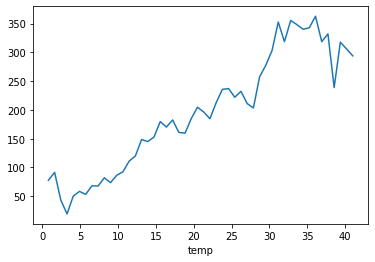

In [122]:
a1.plot()

In [123]:
a2=data.groupby(['atemp'])['count'].mean()

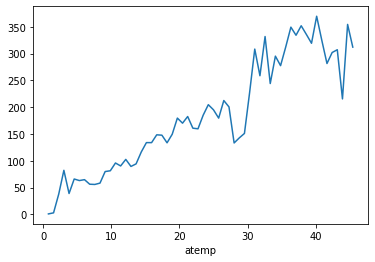

In [124]:
a2.plot()

In [125]:
data_train=data.drop(['count'],axis=1)

In [138]:
data_train=data_train.drop(['registered'],axis=1)

In [139]:
data_test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour'],
      dtype='object')

In [141]:
data_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour'],
      dtype='object')

In [140]:
data_try=data['count']

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [143]:
#method to show predition of various models
models=[
        ('dummy_mean',DummyRegressor(strategy='mean')),
        ('dummy_median',DummyRegressor(strategy='median')),
        ('rand_for',RandomForestRegressor())
]
result=[]
for nam,mod in models:
  mod.fit(data_train,data_try)
  y_pp=mod.predict(data_test)
  result.append((nam,y_pp))


In [145]:
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor
score = cross_val_score(forest_reg, data_train, data_try, cv=4) # calcuating the cross validation score
print (score)

[-0.27157742 -0.2379241   0.35247984  0.34329272]


In [147]:
# a method to show results of various model and their predictions
def _simple_modeling(X_train, X_test, y_train, y_test):
    # sepcifying the model names
    models = [
        ('dummy-mean', DummyRegressor(strategy='mean')),
        ('dummy-median', DummyRegressor(strategy='median')),
        ('random-forest', RandomForestRegressor(random_state=0)),
    ]
    
    results = []

    for name, model in models:
        model.fit(X_train, y_train)# fitting the training data to model
        y_pred = model.predict(X_test) # doing predictions using the model
        
        results.append((name, y_test, y_pred)) # creating the list of predictions from various models
        
    return results

# a method to return the performance metric of the model used in the above method
def simple_modeling(X_train, X_test, y_train, y_test):
    results = _simple_modeling(X_train, X_test, y_train, y_test) # using the function defined above to caluclate the predictions
    
    return [ (r[0], rmsle(r[1], r[2]) ) for r in results] # returning the performance metrics


In [149]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, data_train, data_train, cv=4) # calcuating the cross validation score
print (score)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

[0.98269433 0.99201612 0.9908807  0.98825342]


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
